<a href="https://colab.research.google.com/github/jasonhayes1987/MyProjects/blob/master/Multiple_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

mse=21679345.683107816
m1=-22043.357688811546
m2=55561.99483910235
b=261989.25175691588


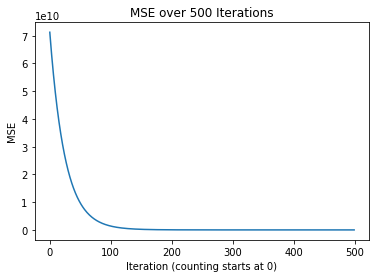

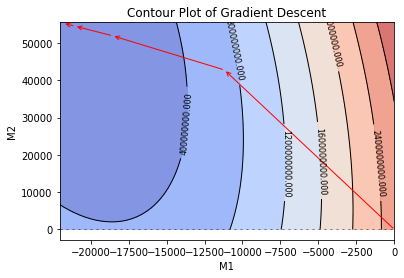

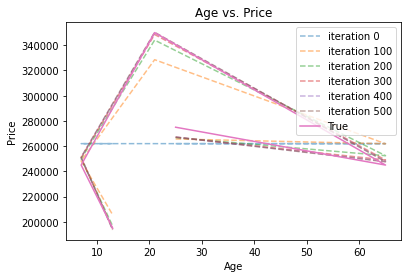

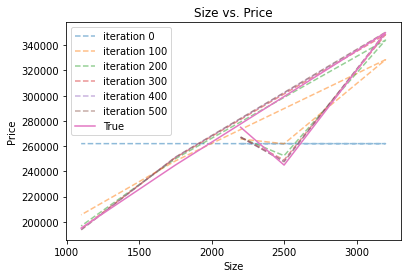

y_new: [334927.26494106 190780.26910393]


In [ ]:
## multiple regression ##

# create training data
x1 = np.array([25,65,21,7,13])
x2 = np.array([2200,2500,3200,1750,1100])
y = np.array([275000,245000,350000,245000,195000])

# set initial values of m1, m2, and b
m1 = 1
m2 = 1
b = 1

# set learning rate
lr = 0.01


# scale the data

x1_mean = np.mean(x1)
x1_std = np.sqrt(np.mean(np.square(x1 - x1_mean)))
z1 = np.array((x1 - x1_mean)/x1_std)

x2_mean = np.mean(x2)
x2_std = np.sqrt(np.mean(np.square(x2 - x2_mean)))
z2 = np.array((x2 - x2_mean)/x2_std)

# initialize variables
num_episodes = 500
yhs = []
m1s = []
m2s = []
bs = []
mses = []

# run training
for i in range(num_episodes):
    # make predictions using current values of m1 & m2 & b
    yh = m1*z1 + m2*z2 + b
    # store predictions for tracking
    yhs.append(yh)
    # subtract prediction from ground truth to get residual
    residual = y - yh
    # calcuate the mse
    mse = np.sum((np.square(residual)))/len(y)
    # store mse for tracking
    mses.append(mse)
    # store coefficients in arrays for tracking
    m1s.append(m1)
    m2s.append(m2)
    bs.append(b)

    # update coefficients using gradient descent
    m1 -= lr*np.mean(-2*z1*(residual))
    m2 -= lr*np.mean(-2*z2*(residual))
    b -= lr*np.mean(-2*(residual))

# print results to log
print(f'mse={mse}')
print(f'm1={m1}')
print(f'm2={m2}')
print(f'b={b}')

# create MSE plot
plt.plot(np.arange(len(mses)), mses)
plt.title('MSE over 500 Iterations')
plt.xlabel('Iteration (counting starts at 0)')
plt.ylabel('MSE')
plt.show()

# create contour plot for m1 and m2
# create 100 equally spaced data points between the first and last entries of each
# coefficient 
M1 = np.linspace(m1s[0], m1s[-1], 100)
M2 = np.linspace(m2s[0], m2s[-1], 100)
B = np.linspace(min(bs), max(bs), 100)

# create a matrix the shape of len(m1) by len(m2) to serve as a grid of values to
# be used in contour plot (every value of m1 with every value of m2)
J = np.zeros((M1.size, M2.size))

# calculate the mse for each (m1,m2) pair
for i in range(len(M1)):
    for j in range(len(M2)):
        yh = M1[i]*z1 + M2[j]*z2 + bs[-1]
        resi = y - yh
        mse = np.sum((np.square(resi)))/len(y)
        J[i,j] = mse

# create a contour plot with color filled slices 
plt.contourf(M1, M2, J, cmap='coolwarm', alpha=0.7)
plt.axhline(0, color='black', alpha=0.5, dashes=[2,4], linewidth=1)
plt.axvline(0, color='black', alpha=0.5, dashes=[2,4],linewidth=1)
# create arrows showing update over every 100 iterations
for i in range(len(m1s)-100):
    if i % 100 == 0:
        plt.annotate('', xy=[m1s[i+100],m2s[i+100]], xytext=[m1s[i],m2s[i]],
                    arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                    va='center', ha='center')
        if i == len(m1s):
            break

# create a contour plot with annotated slices to lay on top of filled contour
CS = plt.contour(M1, M2, J, linewidths=1,colors='black')
plt.clabel(CS, inline=1, fontsize=8)
plt.title("Contour Plot of Gradient Descent")
plt.xlabel("M1")
plt.ylabel("M2")
plt.show()

## create a plot showing prediction line every 100 iterations
# for m1
for i in range(len(m1s)):
    if i % 100 == 0: # fires for i = 0, 100, 200, 300, 400
        pred = m1s[i]*z1 + m2s[i]*z2 + b # predict at iteration i
        plt.plot(x1, pred, ls='--', alpha=0.5, label=f'iteration {i}') # plot
pred = m1s[-1]*z1 + m2s[-1]*z2 + b # prediction at final iteration (500)
plt.plot(x1, pred, ls='--', alpha=0.5, label=f'iteration {len(m1s)}') # plot
plt.plot(x1, y, label='True') # plot true data
plt.title('Age vs. Price')
plt.xlabel('Age')
plt.ylabel('Price')
plt.legend()
plt.show()

# do the same as above but for m2
for i in range(len(m1s)):
    if i % 100 == 0:
        pred = m1s[i]*z1 + m2s[i]*z2 + b
        plt.plot(x2, pred, ls='--', alpha=0.5, label=f'iteration {i}')
pred = m1s[-1]*z1 + m2s[-1]*z2 + b
plt.plot(x2, pred, ls='--', alpha=0.5, label=f'iteration {len(m1s)}')
plt.plot(x2, y, label='True')
plt.title('Size vs. Price')
plt.xlabel('Size')
plt.ylabel('Price')
plt.legend()
plt.show()

## predict house age=[17,52] & house size=[2950,1600]
# create new x1 and x2 input data to predict on
x1_new = [17,52]
x2_new = [2950,1600]

# scale data to scale of initial training data by using mean and standard deviation
# of training data
z1_new = np.array((x1_new - x1_mean)/x1_std)
z2_new = np.array((x2_new - x2_mean)/x2_std)

# make prediction
y_new = m1*z1_new + m2*z2_new + b

# print predictions to log
print(f'y_new: {y_new}')

# Multiple Regression Using Matrices

In [ ]:
class StandardScaler():

    def __init__(self):
        self.mean = None
        self.standard_deviation = None

    def fit(self, data):
        self.mean = np.mean(data, axis=0)
        self.standard_deviation = np.sqrt(np.mean(np.square(data-self.mean), axis=0))

    def transform(self, data):
        return (data-self.mean)/(self.standard_deviation + 1e-7)

In [ ]:
# Turn variables into matrices and solve

X = np.array([[25,2200],[65,2500],[21,3200],[7,1750],[13,1100]])
Y = np.array([275000,245000,350000,245000,195000]).reshape((-1,1))
Theta = np.ones((X.shape[1]+1,1))
lr = 0.01

In [ ]:
# scale data
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [ ]:
# add a column of ones to X to account for bias term being added to Theta matrix
X = np.column_stack((np.ones((X.shape[0],1)),X))

In [ ]:
num_iteration = 500

mses = []
for i in range(num_iteration):
    Yh = X.dot(Theta)
    residual = Y-Yh
    mse = np.sum((np.square(residual)))/len(Y)
    mses.append(mse)
    Theta -= (lr/len(Yh))*(-2*X.T.dot(residual))
    print(mse)

71239381372.72128
68435283781.41439
65742262329.84529
63155894724.027695
60671935620.852455
58286309507.14032
55995103867.29282
53794562627.73758
51681079866.854004
49651193779.53267
47701580885.97002
45829050474.729515
44030539270.511734
42303106317.4702
40643928069.287544
39050293677.58828
37519600470.61159
36049349614.39969
34637141949.076065
33280673993.09257
31977734108.617626
30726198821.517437
29524029289.651257
28369267913.45896
27260035083.0662
26194526056.36895
25171007962.785843
24187816927.584415
23243355311.895443
22336089063.729332
21464545175.50028
20627309243.74707
19823023126.91581
19050382697.23816
18308135682.9008
17595079596.856796
16910059748.778
16251967336.7907
15619737615.772995
15012348139.123657
14428817071.037899
13868201566.446102
13329596215.886908
12812131552.697195
12314972620.007507
11837317595.133713
11378396469.053074
10937469778.74705
10513827390.282782
10106787330.591616
9715694665.985601
9339920425.532425
8978860567.485123
8631934987.036037
82985865

Text(0.5, 1.0, 'Mean Squared Error over Iterations')

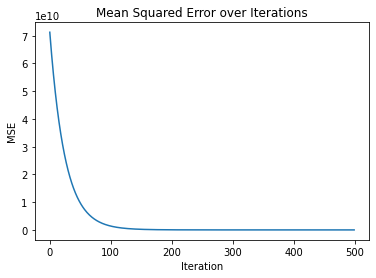

In [ ]:
plt.plot(mses)
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.title('Mean Squared Error over Iterations')

In [ ]:
## make predictions
X_new = np.array([[17,2950],[52,1600]]) # data to make predictions on
X_new = scaler.transform(X_new) # scale data using scale of training data
X_new = np.column_stack((np.ones((X_new.shape[0],1)),X_new)) # add column of ones 
preds = X_new.dot(Theta) # make predictions
print(preds)

[[334927.2649369 ]
 [190780.26910978]]
